# Iris Flower

This notebook explores the famous Iris dataset, which contains measurements of sepal length, sepal width, petal length, and petal width for 150 samples across three species of Iris flowers: Iris setosa, Iris virginica, and Iris versicolor. The dataset is widely used in machine learning for tasks such as classification, clustering, and testing algorithms.

In this notebook, we use these features to develop a linear discriminant model to classify the species of Iris. The analysis serves as an example of data preprocessing, visualization, and model building.

For more information about the original dataset and its uses, [Iris Dataset - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris)
.


## Load the Data

In [1]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [20]:
X = iris.data
y = iris.target_names[iris.target]=='virginica'

A numpy array is returned, with 150 instances.

## 2_ Explore the data
### 2.1_ descriptive statistics

In [3]:

#print (y)
#table with descriptive statistics for each of the two classes
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
df = pd.DataFrame(X, columns=columns)
#add the target column to the dataframe
df["target"] = y
# give aname for the target group
df["target"] = df["target"].replace({True:"virginica", False:"non-virginica"})

#print the table with descriptive statistics for each of the two classes
print(df.groupby("target").describe())




              sepal length (cm)                                               
                          count   mean       std  min    25%  50%  75%  max   
target                                                                        
non-virginica             100.0  5.471  0.641698  4.3  5.000  5.4  5.9  7.0  \
virginica                  50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

              sepal width (cm)         ... petal length (cm)        
                         count   mean  ...               75%  max   
target                                 ...                          
non-virginica            100.0  3.099  ...             4.325  5.1  \
virginica                 50.0  2.974  ...             5.875  6.9   

              petal width (cm)                                            
                         count   mean       std  min  25%  50%  75%  max  
target                                                                    
non-virginica            100.0  0

The descriptive analysis of the Iris dataset reveals distinct differences between virginica and non-virginica species, particularly in petal dimensions. Virginica flowers exhibit larger petals, both in length (mean = 5.552 cm for virginica vs. 2.862 cm for non-virginica) and width (mean = 2.026 cm for virginica vs. 0.786 cm for non-virginica), and slightly longer sepals (mean = 6.588 cm for virginica vs. 5.471 cm for non-virginica), highlighting petal measurements as key distinguishing features. While sepal widths are relatively similar across species, the overall larger size of virginica petals and sepals compared to non-virginica counterparts underscores the importance of these characteristics in species differentiation within the Iris dataset.

### 2.2_ Histogram per feature

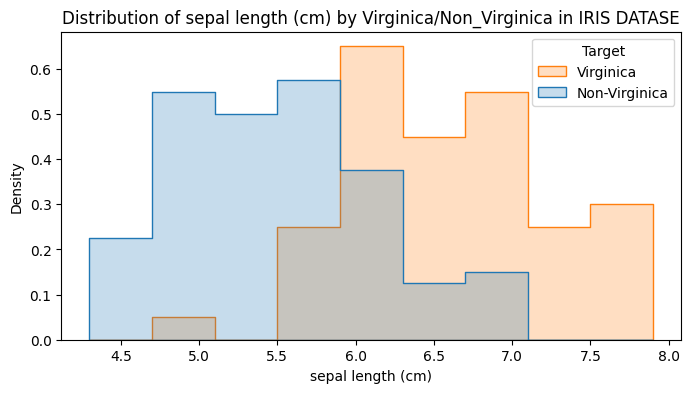

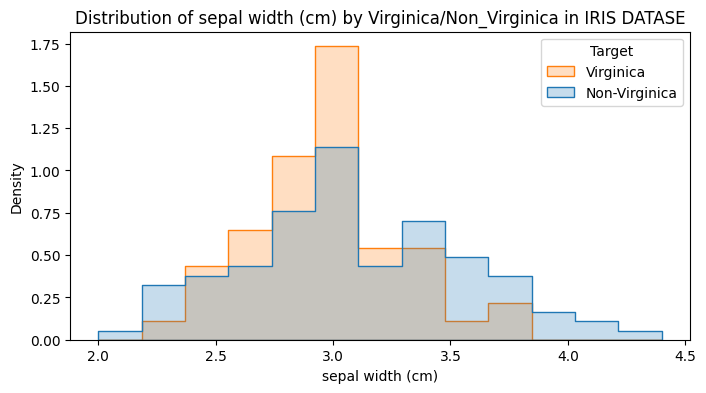

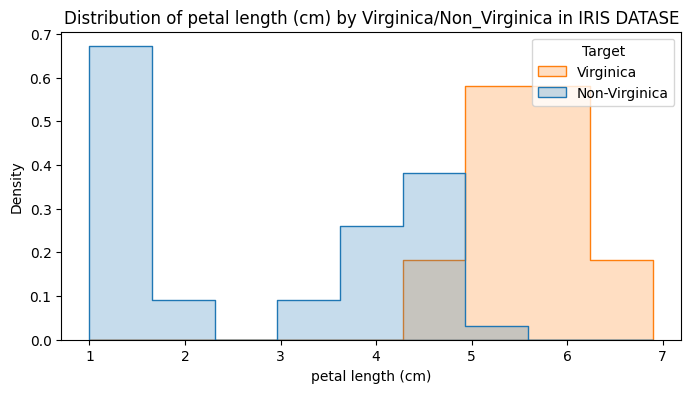

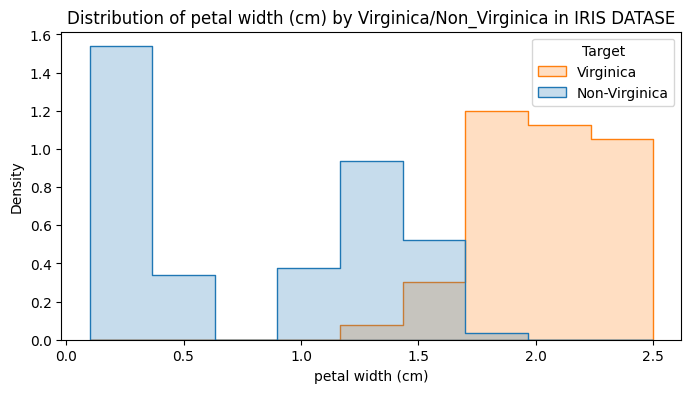

In [4]:
# Iterate over each feature to create a histogram
for feature in columns:
    plt.figure(figsize=(8, 4))  # Optional: Adjust the figure size as needed
    sns.histplot(data=df, x=feature, hue="target", element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {feature} by Virginica/Non_Virginica in IRIS DATASE')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Target', labels=['Virginica', 'Non-Virginica'])
    plt.show()

 

The four plots depict the distribution of sepal width, petal length, and petal width for Virginica and Non-Virginica species of the Iris flower:

1. Sepal Width: Shows a considerable overlap between Virginica and Non-Virginica species, with both distributions peaking around 3.0 cm.

2. Petal Length: Demonstrates a clear distinction between the two species, with Non-Virginica showing shorter petal lengths peaking around 1.5 cm and Virginica showing longer lengths with a peak around 5.5 cm.

3. Petal Width: Similar to petal length, there's a noticeable difference between the species. Non-Virginica has a narrower petal width peaking just below 0.5 cm, while Virginica has wider petals, peaking around 2.0 cm.

Each histogram shows density on the y-axis, indicating the proportion of samples within each category and measurement. The clear distinctions in petal length and width can be useful for species identification

### 2.3 Correlation matrix between the four features

                   sepal length (cm)  sepal width (cm)  petal length (cm)   
sepal length (cm)           1.000000         -0.117570           0.871754  \
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


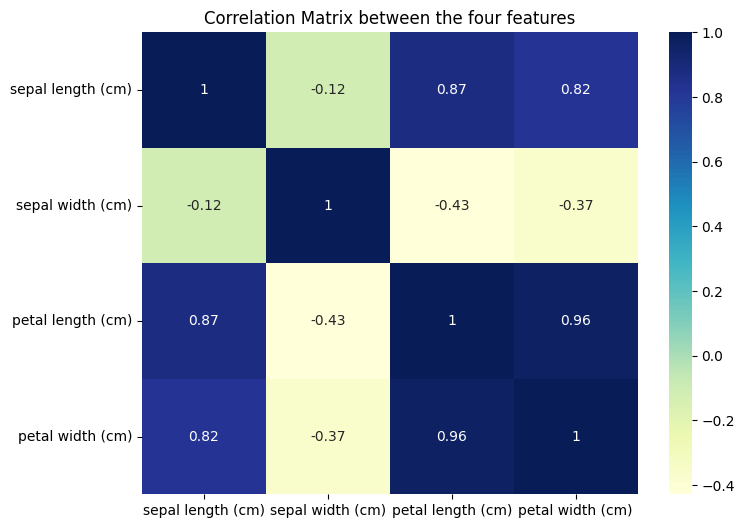

In [5]:
#Correlation matrix between the four features
correlation_matrix = df[columns].corr()
print(correlation_matrix)
#plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix between the four features')
plt.show()


The image shows a correlation matrix for four features of the Iris flower dataset: sepal length, sepal width, petal length, and petal width. Here are the insights:

- Sepal length and petal length are strongly positively correlated (0.87), as are sepal length and petal width (0.82), suggesting that longer sepals are associated with longer and wider petals.
- Petal length and petal width are very strongly positively correlated (0.96), indicating that as petal length increases, petal width tends to increase as well.
- Sepal width is negatively correlated with petal length (-0.43) and petal width (-0.37), suggesting that wider sepals are associated with shorter and narrower petals.
- The correlations between sepal width and sepal length are very weak (-0.12), indicating little to no linear relationship.
his correlation matrix is a usefull tool for understanding the relationships between the dimensions of Iris flowers and can be very useful for tasks such as feature selection in machine learning.

### 2.4_Graphs from Kaggle for inspiration

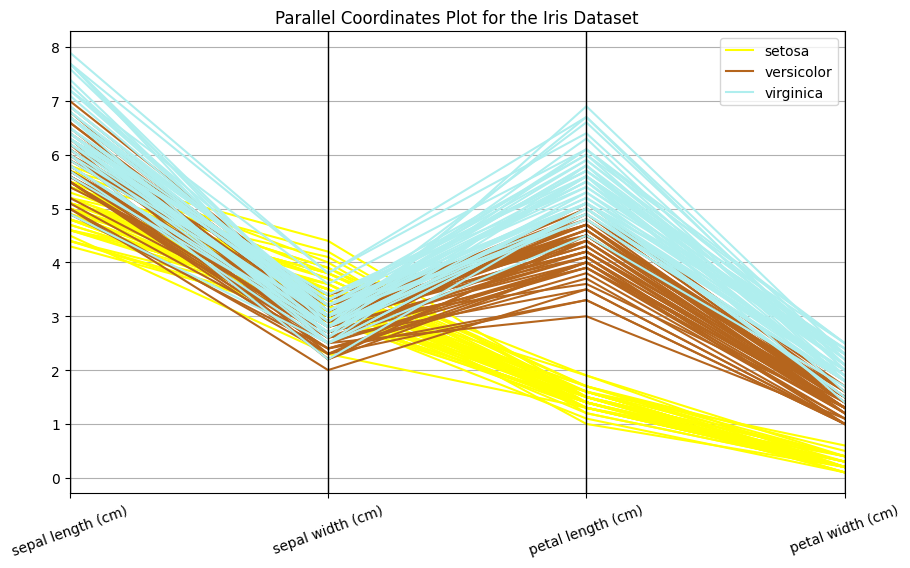

In [6]:

from pandas.plotting import parallel_coordinates

# Create a DataFrame with the features and add the species (target) as a new column
df = pd.DataFrame(X, columns=iris.feature_names)
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Plotting with parallel_coordinates
plt.figure(figsize=(10, 6))
parallel_coordinates(df, 'Species', color=['yellow', '#b5651d', '#AFEEEE'])
plt.title('Parallel Coordinates Plot for the Iris Dataset')
plt.xticks(rotation=20)  # Rotate x-axis labels for better readability
plt.show()


I like this graph becouse it look cool :) <br>
The parallel coordinates graph is a visually appealing tool that clearly shows how different Iris species vary across multiple features. It highlights that Virginica typically has longer sepals but shorter petals compared to Setosa and Versicolor, which share similar traits like longer sepals and shorter petals. This graph makes it easy to compare the feature profiles of each species at a glance.
 For more detailed visualizations and insights into data visualization techniques, check out this resource: Python Data Visualizations on Kaggle.

https://www.kaggle.com/code/benhamner/python-data-visualizations?scriptVersionId=1465139&cellId=15

Lets take a look at another intresting plot:

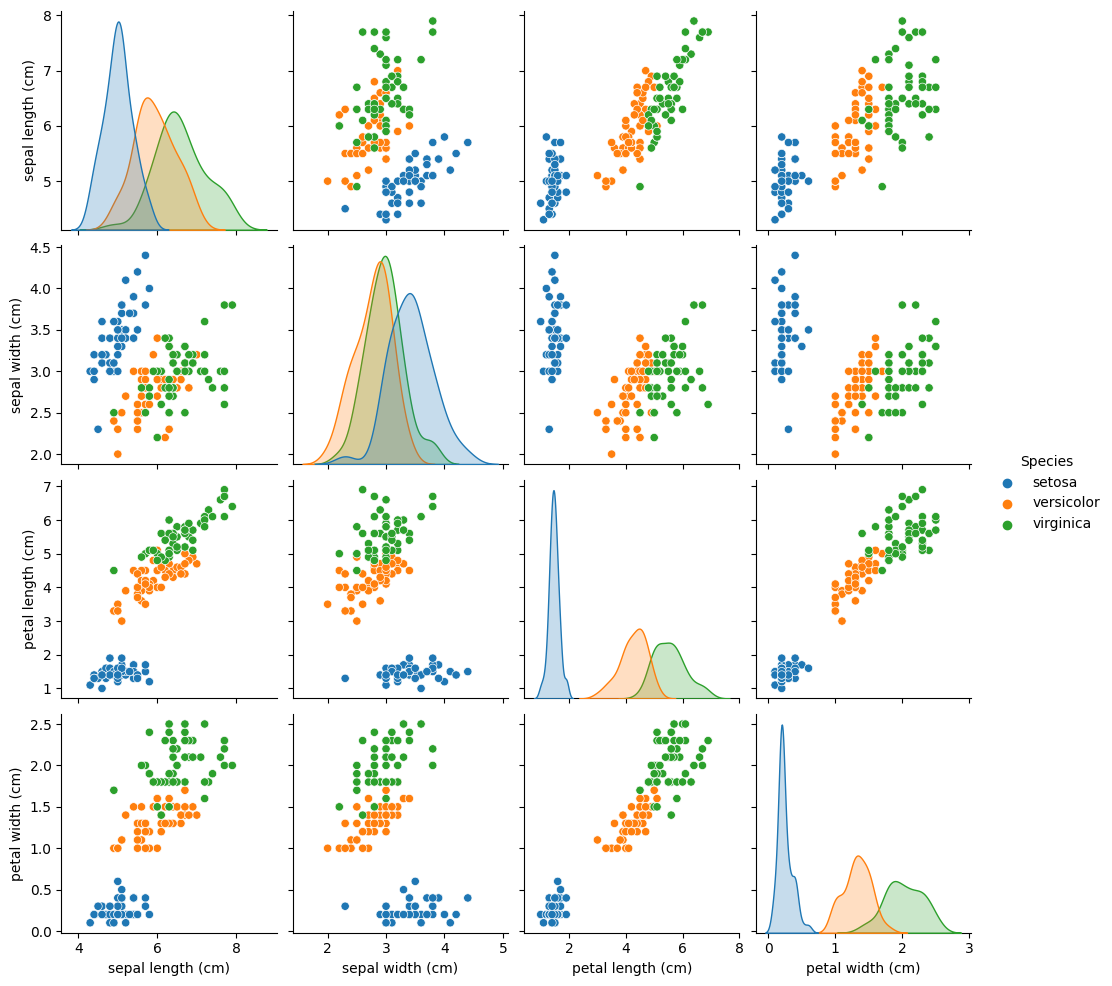

In [7]:

from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Convert the sklearn Bunch object to a pandas DataFrame
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the species (target) as a new column in the DataFrame
df_iris['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Now you can use sns.pairplot with the DataFrame
sns.pairplot(df_iris, hue="Species")
plt.show()



The graph shows us how different features of the flowers compare to each other and how each feature is spread out. Specifically, looking at how long the petals are helps us tell the Setosa flowers apart from the others. Also, by looking at the chart that shows both petal length and width together, we can see clear differences between all the flower types.

source:https://www.kaggle.com/code/vinayshaw/iris-species-100-accuracy-using-naive-bayes?scriptVersionId=37464433&cellId=29

Another type of plot could be Violin Plot:<br>
 Violin is a method to visualize the distribution of numerical data of different variables.its more comparable with box plot. It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis. The density is mirrored and flipped over and the resulting shape is filled in, creating an image resembling a violin. The advantage of a violin plot is that it can show nuances in the distribution that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly shows the outliers in the data

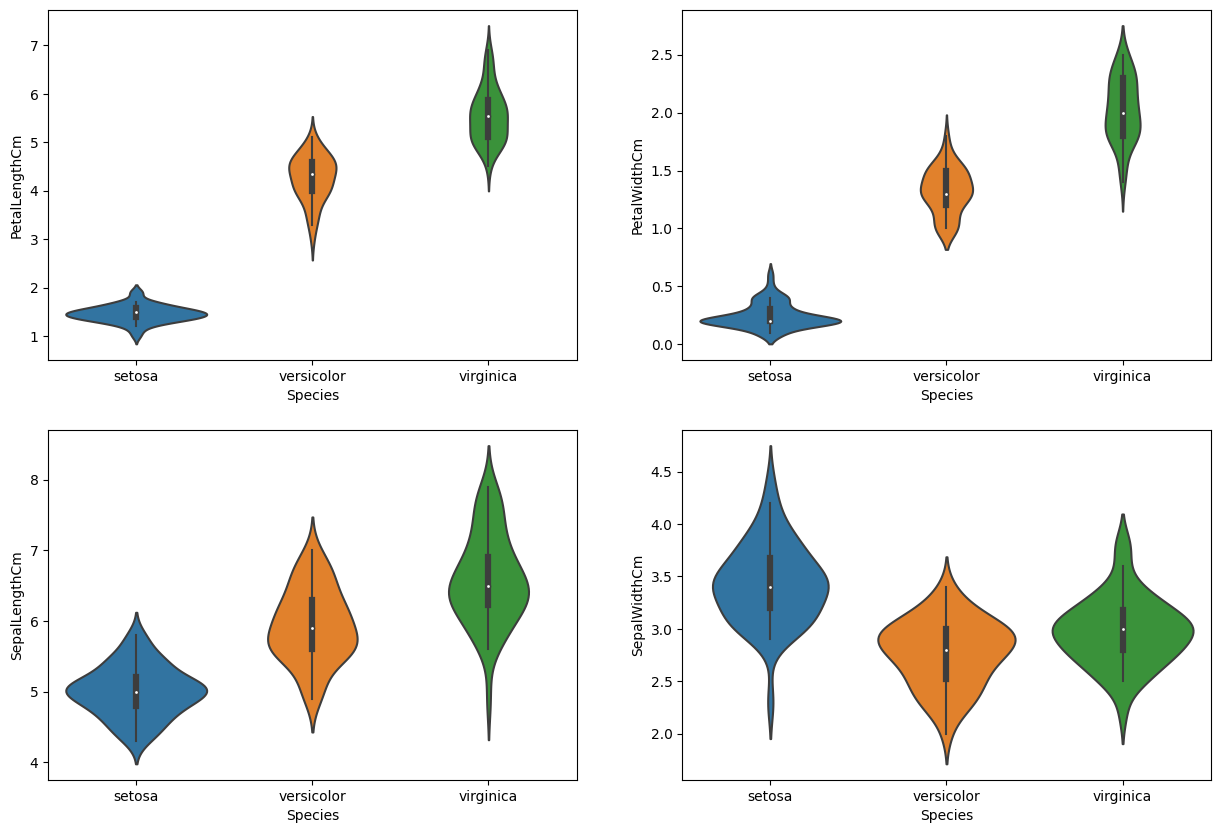

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Convert to a pandas DataFrame
df_iris = pd.DataFrame(X, columns=iris_data.feature_names)

# Add the species names
df_iris['Species'] = pd.Categorical.from_codes(y, iris_data.target_names)

# Adjust column names if necessary (assuming your code expects 'Cm' suffix)
df_iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

# Now, create the violin plots
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(x='Species', y='PetalLengthCm', data=df_iris)

plt.subplot(2,2,2)
sns.violinplot(x='Species', y='PetalWidthCm', data=df_iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y='SepalLengthCm', data=df_iris)

plt.subplot(2,2,4)
sns.violinplot(x='Species', y='SepalWidthCm', data=df_iris)

plt.show()



this plot shows the differences in sepal and petal sizes across the three varieties: Setosa, Versicolor, and Virginica. Setosa is easily identified by its uniquely small and consistent petal sizes. In contrast, Versicolor and Virginica display larger petals, with Virginica's petals slightly exceeding Versicolor's in size. Sepal analysis shows Setosa with notably wider sepals compared to the other two. These plots underscore the effectiveness of petal size in distinguishing the flower types, particularly Setosa, whose floral components are markedly smaller. However, identifying flowers based on sepal size is more challenging due to the size overlap between Versicolor and Virginica.<br>
source: https://www.kaggle.com/code/vinayshaw/iris-species-100-accuracy-using-naive-bayes?scriptVersionId=37464433&cellId=35


## 3_Spliting The Data
 here we will split the data to a train set (120 records), a validation set (15 records)  and a test set (15 records)

In [21]:
y = iris.target_names[iris.target]=='virginica'
#Split the data to a train set (120 records), a validation set (15 records)  and a test set (15 records)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=15, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape)

# If X_train and X_val were converted to numpy arrays, convert them back to DataFrame
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=iris.feature_names)
if not isinstance(X_val, pd.DataFrame):
    X_val = pd.DataFrame(X_val, columns=iris.feature_names)

(120, 4) (15, 4) (15, 4)


## 4_logistic regression models<br>
Here we will run 4 models for all features.
choosing order of the features can be done randomly or better way is to  choose first, **the feature that is more effective in separating the species**. so as we noticed from the prevouse plots,the petal length and width are the most effective in separating our classes(Verginica & Non_verginica).so We'll start with petal length, then add features in the order of petal width, sepal length, and finally sepal width.<br>

*side note*: you might see a weird way of fitting and pridect the models without using for loop :o. this is becouse it's a long tables( 4 tables and each one with 15 rows) so i was not able to see all the data.


### Model 1 with feature:petal length (cm)

In [23]:
from sklearn.metrics import roc_auc_score


feature_sets = [
    ["petal length (cm)"],
    ["petal length (cm)", "petal width (cm)"],
    ["petal length (cm)", "petal width (cm)", "sepal length (cm)"],
    ["petal length (cm)", "petal width (cm)", "sepal length (cm)", "sepal width (cm)"]
]

log_reg1 = LogisticRegression(random_state=42)
# Train, predict, and evaluate each model for first feature in feature_sets
X_train_sub = X_train[feature_sets[0]]
X_val_sub_1 = X_val[feature_sets[0]]
log_reg1.fit(X_train_sub, y_train)

predictions_1 = log_reg1.predict(X_val_sub_1) 
probabilities_1 = log_reg1.predict_proba(X_val_sub_1)[:, 1] 

# Create a DataFrame with the desired output
output_df = pd.DataFrame({
    'Instance Number': range(1, len(X_val_sub_1) + 1),  # Starting instance numbers from 1 for readability
    'Probability of Virginica': probabilities_1,
    'Actual Prediction': predictions_1,
    'Ground Truth': y_val  # Reset index if y_val is a pandas Series to align with the instance numbers
})
print(f"model 1 with features: {feature_sets[0]}")
# Display the DataFrame
print(output_df)

# Calculate AUC-ROC scores for this model
auc_score_1 = roc_auc_score(y_val, probabilities_1)

print(f"Model 1 AUC-ROC Score: {auc_score_1:.4f}")

model 1 with features: ['petal length (cm)']
    Instance Number  Probability of Virginica  Actual Prediction  Ground Truth
0                 1                  0.260477              False         False
1                 2                  0.260477              False         False
2                 3                  0.116116              False         False
3                 4                  0.000007              False         False
4                 5                  0.260477              False         False
5                 6                  0.202258              False         False
6                 7                  0.000013              False         False
7                 8                  0.000010              False         False
8                 9                  0.979920               True          True
9                10                  0.645713               True         False
10               11                  0.000010              False         False
11     

**model 1** demonstrates high discriminative power for certain instances, as evidenced by probabilities close to 0 or 1 (e.g., instance 4 with a probability near 0, and instances 8 and 11 with probabilities near 1). This suggests that 'petal length (cm)' is a strong feature for distinguishing between the classes for some of the instances.<br>For most instances where the model is highly confident (probabilities close to 0 or 1), the actual prediction aligns with the ground truth. This is a good sign and suggests that when the model is confident, it is likely to be correct, especially for instances with very high or very low probability scores.<br>
However There is at least one notable misclassification (instance 10), where the model predicted the instance to be "Virginica" (True) with a probability of 0.645713, but the ground truth was False. This indicates that while 'petal length (cm)' is a useful feature, it is not infallible, and there may be overlap in petal length values across the two classes. Given this will leads to that we might can adjust the decision threshold (default is 0.5) to improve model performance. For example, increasing the threshold slightly above 0.5 might reduce false positives without significantly increasing false negatives, depending on the distribution of probabilities.

### Model2 with features:petal length (cm) and petal width (cm)

In [24]:
# Train, predict, and evaluate each model for first feature in feature_sets
X_train_sub = X_train[feature_sets[1]]
X_val_sub_2 = X_val[feature_sets[1]]
log_reg2 = LogisticRegression(random_state=42)
log_reg2.fit(X_train_sub, y_train)

predictions_2 = log_reg2.predict(X_val_sub_2) 
probabilities_2 = log_reg2.predict_proba(X_val_sub_2)[:, 1] 

# Create a DataFrame with the desired output
output_df = pd.DataFrame({
    'Instance Number': range(1, len(X_val_sub_2) + 1),  # Starting instance numbers from 1 for readability
    'Probability of Virginica': probabilities_2,
    'Actual Prediction': predictions_2,
    'Ground Truth': y_val  # Reset index if y_val is a pandas Series to align with the instance numbers
})
print(f"model 2 with features: {feature_sets[1]}")
# Display the DataFrame
print(output_df)

# Calculate AUC-ROC scores for this model
auc_score_1 = roc_auc_score(y_val, probabilities_2)

print(f"Model 2 AUC-ROC Score: {auc_score_1:.4f}")

model 2 with features: ['petal length (cm)', 'petal width (cm)']
    Instance Number  Probability of Virginica  Actual Prediction  Ground Truth
0                 1                  0.240579              False         False
1                 2                  0.240579              False         False
2                 3                  0.086569              False         False
3                 4                  0.000004              False         False
4                 5                  0.240579              False         False
5                 6                  0.113127              False         False
6                 7                  0.000006              False         False
7                 8                  0.000008              False         False
8                 9                  0.966496               True          True
9                10                  0.639179               True         False
10               11                  0.000006              False  

**Model 2**, which looks at both the length and width of petals, is generally accurate at predicting if a flower is "Virginica" or not.However, it incorrectly predicts flower number 10 as "Virginica" with a relatively high confidence (probability of 0.639179), even though it's not. This suggests that while adding petal width improves the model's predictions, there are still specific instances where the combination of these features might lead to overconfidence in incorrect predictions.

### Model 3: petal length (cm),petal width (cm) and sepal length (cm)

In [25]:
# Train, predict, and evaluate each model for first feature in feature_sets
log_reg3 = LogisticRegression(random_state=42)
X_train_sub = X_train[feature_sets[2]]
X_val_sub_3= X_val[feature_sets[2]]
log_reg3.fit(X_train_sub, y_train)

predictions_3 = log_reg3.predict(X_val_sub_3) 
probabilities_3 = log_reg3.predict_proba(X_val_sub_3)[:, 1] 

# Create a DataFrame with the desired output
output_df = pd.DataFrame({
    'Instance Number': range(1, len(X_val_sub_3) + 1),  # Starting instance numbers from 1 for readability
    'Probability of Virginica': probabilities_3,
    'Actual Prediction': predictions_3,
    'Ground Truth': y_val  # Reset index if y_val is a pandas Series to align with the instance numbers
})
print(f"model 3 with features: {feature_sets[2]}")
# Display the DataFrame
print(output_df)

# Calculate AUC-ROC scores for this model
auc_score_1 = roc_auc_score(y_val, probabilities_3)

print(f"Model 3 AUC-ROC Score: {auc_score_1:.4f}")

model 3 with features: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']
    Instance Number  Probability of Virginica  Actual Prediction  Ground Truth
0                 1                  0.292006              False         False
1                 2                  0.314790              False         False
2                 3                  0.105767              False         False
3                 4                  0.000004              False         False
4                 5                  0.249488              False         False
5                 6                  0.148733              False         False
6                 7                  0.000006              False         False
7                 8                  0.000007              False         False
8                 9                  0.952911               True          True
9                10                  0.579150               True         False
10               11                  0.000007

**Model 3**, which incorporates petal length, petal width, and sepal length, shows nuanced decision-making in predicting "Virginica". It generally aligns well with the ground truth, indicating the added sepal length contributes positively to distinguishing characteristics. However, the model's prediction for flower number 10 stands out: it incorrectly identifies it as "Virginica" with a moderate probability of 0.579150. This instance highlights a challenge - even with three features, the model can still be misled by certain combinations of measurements, suggesting complexity in floral characteristics that might not be fully captured by the model.





### Model 4: petal length (cm),petal width (cm), sepal length (cm) and sepal width (cm)

In [27]:
# Train, predict, and evaluate each model for first feature in feature_sets
log_reg4 = LogisticRegression(random_state=42)
X_train_sub = X_train[feature_sets[3]]
X_val_sub = X_val[feature_sets[3]]
log_reg4.fit(X_train_sub, y_train)

predictions = log_reg4.predict(X_val_sub) 
probabilities = log_reg4.predict_proba(X_val_sub)[:, 1] 

# Create a DataFrame with the desired output
output_df = pd.DataFrame({
    'Instance Number': range(1, len(X_val_sub) + 1),  # Starting instance numbers from 1 for readability
    'Probability of Virginica': probabilities,
    'Actual Prediction': predictions,
    'Ground Truth': y_val  # Reset index if y_val is a pandas Series to align with the instance numbers
})
print(f"model 4 with features: {feature_sets[3]}")
# Display the DataFrame
print(output_df)
from sklearn.metrics import roc_auc_score


# Calculate AUC-ROC scores for this model
auc_score_1 = roc_auc_score(y_val, probabilities)

print(f"Model 4 AUC-ROC Score: {auc_score_1:.4f}")


model 4 with features: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']
    Instance Number  Probability of Virginica  Actual Prediction  Ground Truth
0                 1                  0.279186              False         False
1                 2                  0.299937              False         False
2                 3                  0.106169              False         False
3                 4                  0.000004              False         False
4                 5                  0.244873              False         False
5                 6                  0.151592              False         False
6                 7                  0.000004              False         False
7                 8                  0.000005              False         False
8                 9                  0.950755               True          True
9                10                  0.574468               True         False
10               11      

**Model 4**, which uses a comprehensive set of features including petal length, petal width, sepal length, and sepal width, demonstrates a refined ability to predict whether a flower is "Virginica." The inclusion of all these features seems to maintain high accuracy in predictions, closely mirroring the ground truth for most instances.

However, similar to the previous models, flower number 10 remains a point of contention. Despite the expanded feature set, the model still incorrectly predicts it as "Virginica" with a probability of 0.574468. 

 summarizing the data to a single measure (number) per model.and for this part We used the AUC-ROC method because it provides a comprehensive measure of a model's ability to distinguish between different classes across all possible thresholds. It's especially useful for evaluating binary classification models under varying conditions, helping to assess their performance independently of any specific classification cutoff. This makes it a valuable tool for comparing models and ensuring they not only make accurate predictions but also confidently differentiate between classes.

 | Model | AUC-ROC Score |
|-------|---------------|
| 1     | 1.0000        |
| 2     | 1.0000        |
| 3     | 1.0000        |
| 4     | 1.0000        |


and here as we can see in the table all the models are doing great and similar. and i think this is because the feater petal lenth is doing great in deviding the flowers. so if we do a model without the feature petal length we might see very bad perfomance.


## 5_decision boundary:
Plotting decision boundaries, especially for models with more than two features, requires some creative visualization techniques. For models with 1 or 2 features, we can directly plot the decision boundary on a 2D graph. For a model with 3 features, we'll use a 3D plot, which Plotly excels at because it allows interactive rotation and better examination of the decision space.

In [48]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go


feature_name = X_val_sub_1.columns[0]  # Extract the name of the feature

# Generate a range of values for the feature, ensuring it covers the validation data range
feature_range = np.linspace(X_val_sub_1.min().values[0], X_val_sub_1.max().values[0], 300).reshape(-1, 1)

# Convert feature_range to a DataFrame with the appropriate column name
feature_range_df = pd.DataFrame(feature_range, columns=[feature_name])

# Predict probabilities for these values using the DataFrame
probabilities = log_reg1.predict_proba(feature_range_df)[:, 1]

# Ensure the feature_range is flattened for plotting
feature_range_flat = feature_range.flatten()

# Plotting
fig = go.Figure()

# Plot size
fig.update_layout(
    autosize=False,
    width=700,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

# Decision Boundary
fig.add_trace(go.Scatter(x=feature_range_flat, y=probabilities, mode='lines', name='Probability'))

# Validation Data Points
x_values = X_val_sub_1.iloc[:, 0].values  # Assuming the first column is the feature we're interested in
fig.add_trace(go.Scatter(x=x_values, y=y_val, mode='markers', name='Validation Data', marker=dict(color='LightSkyBlue')))

# Update layout
fig.update_layout(title='Decision Boundary for Model with 1 Feature',
                  xaxis_title=feature_name,
                  yaxis_title='Probability of Virginica')

# Show plot
fig.show()


 the curve in the graph is characteristic of logistic regression, where the output can be interpreted as the probability of a particular class membership—in this case, the likelihood that an Iris flower is of the Virginica species based on the input feature.

The steepness of the curve around the feature value of 4.9 suggests that this is a critical point where the model's predictions shift from classifying the Iris flower as Non-Virginica to Virginica. This steep transition implies that the model has high confidence in its predictions on either side of the decision boundary.



Dicision boundry for 2 featurs

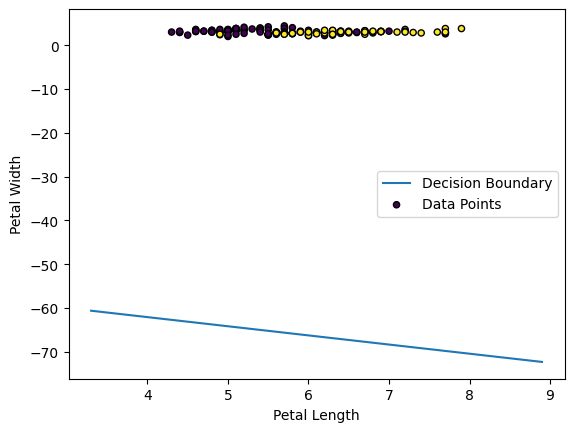

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Example setup: Assuming you have a trained logistic regression model named 'model'
# and a dataset 'X' with two features.

# Calculate min and max feature values for the first feature
MIN_FEATURE_VALUE = X[:, 0].min() - 1  # Assuming X[:, 0] is the first feature
MAX_FEATURE_VALUE = X[:, 0].max() + 1  # Adding/subtracting 1 for a bit of margin

# Generate values for the first feature (x1)
decision_boundary_x1 = np.linspace(MIN_FEATURE_VALUE, MAX_FEATURE_VALUE, 10)

# Calculate values for the second feature (x2) based on the decision boundary equation
# Note: This assumes a binary classification logistic regression model
decision_boundary_x2 = -log_reg2.intercept_ / log_reg2.coef_[0][1] - log_reg2.coef_[0][0] / log_reg2.coef_[0][1] * decision_boundary_x1

# Plotting the decision boundary
plt.plot(decision_boundary_x1, decision_boundary_x2, label='Decision Boundary')

# Optionally, add your data points to the plot to visualize how they are separated by the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20, label='Data Points')  # Assuming 'y' is your target variable
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


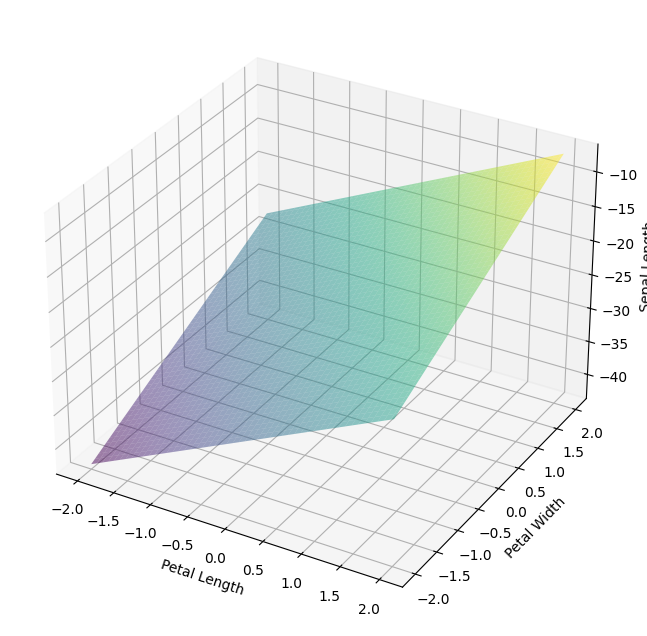

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This is necessary for 3D plotting
from sklearn.linear_model import LogisticRegression

# Assuming 'model' is your trained LogisticRegression model
# and you have determined MIN_FEATURE_VALUE and MAX_FEATURE_VALUE based on your dataset

# Setup for 3D plotting
fig = plt.figure()
# set up size of the figure
fig.set_size_inches(11, 8)
ax = fig.add_subplot(111, projection='3d')

# Generate meshgrid for the first two features
x1, x2 = np.meshgrid(np.linspace(MIN_FEATURE_VALUE, MAX_FEATURE_VALUE, 100), 
                     np.linspace(MIN_FEATURE_VALUE, MAX_FEATURE_VALUE, 100))

# Calculate the decision boundary for the third feature
# This equation is derived from the logistic regression decision function
decision_boundary_x3 = -log_reg3.intercept_ / log_reg3.coef_[0][2] - (log_reg3.coef_[0][0] / log_reg3.coef_[0][2]) * x1 - (log_reg3.coef_[0][1] / log_reg3.coef_[0][2]) * x2

# Plot the decision boundary surface
ax.plot_surface(x1, x2, decision_boundary_x3, alpha=0.5, cmap='viridis')

# Optionally, plot your data points. Assuming 'X' is your feature matrix and 'y' is the target vector
# You'll need to adjust this part based on how your data is structured
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k')

ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Length')
plt.show()


In [37]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression

# Example setup: Assuming 'model' is your trained LogisticRegression model
# Define your feature ranges based on your dataset
MIN_PETAL_LENGTH = -2  # Example minimum value for Petal Length
MAX_PETAL_LENGTH = 2   # Example maximum value for Petal Length
MIN_PETAL_WIDTH = -2   # Example minimum value for Petal Width
MAX_PETAL_WIDTH = 2    # Example maximum value for Petal Width

# Generate meshgrid for Petal Length and Petal Width
petal_length, petal_width = np.meshgrid(np.linspace(MIN_PETAL_LENGTH, MAX_PETAL_LENGTH, 100), 
                                        np.linspace(MIN_PETAL_WIDTH, MAX_PETAL_WIDTH, 100))

# Calculate the decision boundary for Sepal Length
# This is a simplified example. Adjust the calculation based on your actual model and features.
sepal_length_decision_boundary = -log_reg3.intercept_ / log_reg3.coef_[0][2] - (log_reg3.coef_[0][0] / log_reg3.coef_[0][2]) * petal_length - (log_reg3.coef_[0][1] / log_reg3.coef_[0][2]) * petal_width

# Plotting
fig = go.Figure(data=[
    go.Surface(z=sepal_length_decision_boundary, x=petal_length, y=petal_width, colorscale='Viridis', opacity=0.5),
    # Add your data points here. Replace 'data_petal_length', 'data_petal_width', 'data_sepal_length' with your actual data arrays.
    # go.Scatter3d(x=data_petal_length, y=data_petal_width, z=data_sepal_length, mode='markers', marker=dict(size=5, color='red'))
])

# Update plot layout with actual feature names
fig.update_layout(title='3D Decision Boundary with Plotly', scene=dict(
                    xaxis_title='Petal Length',
                    yaxis_title='Petal Width',
                    zaxis_title='Sepal Length'),
                  autosize=False,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()


### Failure modes:

The models consistently fail to accurately predict instance No. 10, where the probability of being classified as the positive class falls between 0.574468 and 0.645713. This suggests a failure pattern where models struggle with instances that are on the borderline of classification thresholds, indicating possible uncertainty or overlap in feature values for this particular instance.


the case of instance No. 10, the failure pattern across models suggests that the features of this particular instance are such that it closely mimics characteristics of both classes within the range of the models' decision thresholds. This could imply that:

The instance is an outlier or noisy data point that does not represent the general distribution of either class well.
The feature space is not sufficiently expressive to capture the nuances necessary for correct classification of borderline instances, indicating a need for additional or more informative features.
There might be a class overlap in the feature space for this instance, making it inherently difficult to classify with the given features.
Addressing these issues could be applying different thresholding strategies to improve classification performance on borderline instances.



### Recommend the best model :

After reviewing the performance of all four models, it's clear they are all performing well. However, there's room for improvement, particularly by adjusting the threshold used to determine positive classifications. Currently, a default threshold of 0.5 is used, but this seems to lead to errors, especially in cases where the model's predictions are just on the edge of this cutoff. By **increasing this threshold slightly**, we could likely reduce the number of incorrect positive predictions, enhancing the model's accuracy in identifying true positive cases without greatly affecting its ability to correctly identify all positive instances.For instance, if the current threshold is set at 0.5, adjusting it to a higher value such as 0.6 or 0.7 could lead to more conservative predictions, where the model only predicts positive when it is more certain. This adjustment could be particularly beneficial in scenarios where the cost of a false positive is high.<br>
Given that all models achieved an AUC score of 1, distinguishing the best model among them is challenging. My preference leans towards Model 2, which utilizes two features: petal length and width. The rationale behind this choice is twofold. Firstly, its simplicity, having fewer features, does not compromise its effectiveness compared to more complex models, aligning with the principle that simpler is often better. Secondly, exploratory data analysis (EDA) has shown that petal characteristics are highly effective at differentiating between the two flower groups. Therefore, there seems to be little advantage in adding complexity when two features suffice for accurate classification.
<br>
lets run this model on the test Data,to make sure the AUC is correct

In [55]:
# Initialize and train Model 2 (Logistic Regression using petal length and width)

log_reg2.fit(X_train, y_train)

# Predict probabilities on the test set
probabilities_test = log_reg2.predict_proba(X_test)[:, 1]

# Calculate the AUC score on the test set
auc_score_test = roc_auc_score(y_test, probabilities_test)

print(f"Model 2 AUC Score on Test Set: {auc_score_test:.4f}")

Model 2 AUC Score on Test Set: 1.0000


c:\Users\marya\Documents\Courses\Cscn8010\class_Notbook\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



so as we can see here also the test set have the same result as validation.the AUC equal to 1.